In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn import cluster
from sklearn.mixture import GMM, DPGMM
from collections import Counter
from sklearn import preprocessing
from __future__ import print_function
import mplleaflet
%matplotlib inline
pd.set_option('display.max_columns', 40)

/Users/eliseowang/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Exercise 1

(a)

In [2]:
# open the csv file
df1 = pd.read_csv('original_with_duplicates_noid.csv')
df1.head(5)

,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,stopped.bc.desc,stopped.bc.violent,stopped.bc.other,stopped.bc.object,stopped.bc.casing,stopped.bc.lookout,stopped.bc.drugs,stopped.bc.clothing,stopped.bc.furtive,stopped.bc.bulge,precinct,inside.outside,location.housing,observation.period,officer.uniform,additional.report,additional.investigation,additional.proximity,additional.evasive,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2012,False,False,False,black,27,medium,male,5.666667,180,False,False,False,False,False,False,False,False,True,True,30,False,neither,1,False,False,True,False,False,False,False,False,False,False,False,False,Saturday,January,6
1,2011,False,False,False,asian,40,medium,male,6.166667,225,False,False,True,False,False,False,False,False,True,False,72,False,neither,1,False,False,False,False,False,False,False,True,True,False,False,False,Friday,November,6
2,2012,False,False,False,black,20,medium,male,6.000000,200,False,False,False,False,False,False,False,False,True,False,32,False,neither,5,True,False,False,False,False,False,False,False,False,False,False,False,Saturday,August,6
3,2011,False,False,False,black,23,medium,male,5.916667,180,False,False,False,False,False,False,False,False,False,True,75,True,housing,1,True,False,False,True,False,False,False,False,True,False,False,False,Friday,April,1
4,2011,False,False,False,black,33,thin,male,5.666667,175,False,False,False,False,False,False,False,False,True,False,42,False,neither,2,True,False,False,False,False,False,False,False,False,False,False,False,Thursday,December,4


In [3]:
# create dummy variables for the columns of str
data1 = pd.get_dummies(df1)

In [4]:
# build an agglomerative clustering model
# hcm stands for hierarchical clustering model
hcm1 = cluster.AgglomerativeClustering(n_clusters=1000)

In [5]:
# fit the model
hcm1.fit(data1)
print('The number of clusters created by the model is {0}'.format(len(set(hcm1.labels_))))

The number of clusters created by the model is 1000


(b)

In [6]:
# check the real number of duplicates
veri1 = df1.drop_duplicates()
print('The number of real duplicates in the data is {0}.'.format(veri1.shape[0]))

The number of real duplicates in the data is 997.


In [7]:
df1['1000_clusters'] = hcm1.labels_
result1 = df1.drop_duplicates(subset=['1000_clusters'])
result1 = result1.drop(['1000_clusters'], axis=1) #, inplace=True)

In [8]:
# find the unique elements in either result1 or veri1 but not both
print(set(result1.index).symmetric_difference(set(veri1.index)))
# verify if these 3 elements are all in result1
print(set(result1.index).difference(set(veri1.index)))
# now we can calculate the accuracy
# accuracy = true posi + true nega / true posi + false posi + true nega + false nega
accu1 = (1000.0 - 3  + 69 ) / (997 + 3 + 69)
print('The accuracy of the Accumulative Clustering model is {0:.4f}.'.format(accu1))

set([924, 1037, 1038])
set([924, 1037, 1038])
The accuracy of the Accumulative Clustering model is 0.9972.


## try 997 as number of clusters and compare the result

In [9]:
hcm2 = cluster.AgglomerativeClustering(n_clusters=997)
# fit the model
hcm2.fit(data1)
print('The number of clusters created by the model is {0}'.format(len(set(hcm2.labels_))))

The number of clusters created by the model is 997


In [76]:
df1['997_clusters'] = hcm2.labels_
result2 = df1.drop_duplicates(subset=['997_clusters'])
result2 = result2.drop(['997_clusters', '1000_clusters'], axis=1)

In [11]:
# find the unique elements in either result1 or veri1 but not both
print(set(result2.index).symmetric_difference(set(veri1.index)))
# the set is empyt, meaning the clustering model was able to predict all the duplicate items
# now we can calculate the accuracy
# accuracy = true posi + true nega / true posi + false posi + true nega + false nega
accu2 = (1000.0 + 69 ) / (997 + 3 + 69)
print('The accuracy of the Accumulative Clustering model is {0}.'.format(accu2))

set([])
The accuracy of the Accumulative Clustering model is 1.0.


(c)

In part (a), I chose the agglomerative clustering algorithm, set the number of clusters to 1000, fit the data to the model, and added the clustering result label to the dataframe.

In part (b), I first dropped the duplicates from the record and verified the number of 'true' records (997 in this case). Then I compared the clustering result with the deduplicated data, and found out that I have 3 false positives. In the end I calculated the accuracy of this model, the result being 0.9972.

For comparison, I set the number of parameters to 997 and ran the agglomerative clustering model again. It turned out this time the same algorithm was able to detect all the duplicated items.

Caveat: for clustering algorithms like agglomerative clustering, the choice of cluster number is very important; the algorithm can be difficult to use if there is no prior knowledge about the structure of the data.

## Exercise 2

(a)

In [12]:
df2 = pd.read_csv('original_with_errors_noid.csv')
print(df2.shape)
df2.head(5)

(1100, 39)


,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,stopped.bc.desc,stopped.bc.violent,stopped.bc.other,stopped.bc.object,stopped.bc.casing,stopped.bc.lookout,stopped.bc.drugs,stopped.bc.clothing,stopped.bc.furtive,stopped.bc.bulge,precinct,inside.outside,location.housing,observation.period,officer.uniform,additional.report,additional.investigation,additional.proximity,additional.evasive,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2011,False,False,False,black,20,heavy,male,5.500000,200,False,False,False,False,False,False,False,False,True,False,47,False,neither,5,True,False,False,False,False,False,False,True,False,False,False,False,Wednesday,November,4
1,2012,False,False,False,black,24,medium,male,5.666667,155,False,False,False,False,False,False,False,False,True,True,32,False,housing,1,True,False,False,True,False,False,False,True,False,False,False,False,Monday,August,6
2,2011,False,False,False,black,47,heavy,male,6.000000,245,False,False,False,False,False,False,True,False,False,False,25,False,housing,1,False,False,False,False,True,False,True,True,True,False,False,False,Saturday,January,4
3,2012,False,False,False,native.american,14,thin,male,5.500000,140,False,True,False,False,False,False,False,False,True,False,47,False,neither,1,False,False,False,False,True,False,True,True,False,False,False,False,Tuesday,October,4
4,2012,False,False,False,hispanic,21,medium,male,5.750000,145,False,False,False,False,False,False,False,False,True,True,75,False,neither,2,True,False,False,True,True,True,True,True,True,False,False,False,Tuesday,June,5


## Normalize the data

In [13]:
# make dummy variables and normalize the data
df2 = pd.get_dummies(df2)
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
df2_scaled = min_max_scaler.fit_transform(df2)
# Run the normalizer on the dataframe
df2_norm = pd.DataFrame(df2_scaled, columns=df2.columns)
df2_norm.head(5)

,year,found.weapon,found.gun,arrested,suspect.age,suspect.height,suspect.weight,stopped.bc.desc,stopped.bc.violent,stopped.bc.other,stopped.bc.object,stopped.bc.casing,stopped.bc.lookout,stopped.bc.drugs,stopped.bc.clothing,stopped.bc.furtive,stopped.bc.bulge,precinct,inside.outside,observation.period,...,location.housing_transit,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,0.0,0.0,0.0,0.0,0.166667,0.346154,0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.380165,0.0,0.131579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.233333,0.423077,0.210526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.256198,0.0,0.026316,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.616667,0.576923,0.526316,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.198347,0.0,0.026316,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.066667,0.346154,0.157895,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.380165,0.0,0.026316,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.183333,0.461538,0.175439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.611570,0.0,0.052632,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Clustering

In [14]:
# create a list of eps to experiment on
k = [np.power(10, j) for j in np.linspace(-5, 5, 300)]
# choose dbscan because it doesn't require the number of clusters as input
db_labels = {}
for i in k:
    dbscan = cluster.DBSCAN(eps=i, min_samples=1)
    dbscan.fit(df2_norm)
    db_labels[i] = len(set(dbscan.labels_))

(array([ 136.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
      

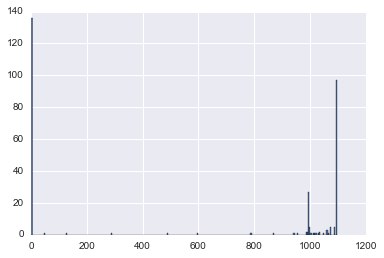

In [15]:
plt.hist(db_labels.values(), bins=250)
# judging from the histogram, I think
# the 'true' number of clusters should be around 997

## Choose the parameter eps

In [16]:
# track back the eps for building the model
# here I played around with the numbers and found out that
# more paramters leads to 996
ls = []
for key, val in db_labels.iteritems():
    if val == 996:
        ls.append(key)
sorted(ls)

[0.30311355015675762,
 0.3273785095948577,
 0.35358593665351756,
 0.38189133047818541,
 0.4124626382901348,
 0.44548125188449889,
 0.48114308390032545,
 0.51965973024861967,
 0.56125972559549664,
 0.6061898993497572,
 0.65471684020047294,
 0.70712847789429967,
 0.76373579163780114,
 0.82487465526145809,
 0.89090783009341246,
 0.96222711736751343]

## I think the number 'true' items is 996.

(b)

In [17]:
# choose a number around the mean of the eps list and fit the data again
dbscan = cluster.DBSCAN(eps=0.561, min_samples=1)
dbscan.fit(df2_norm)

DBSCAN(algorithm='auto', eps=0.561, leaf_size=30, metric='euclidean',
    min_samples=1, p=None, random_state=None)

In [18]:
df2['label'] = dbscan.labels_

In [19]:
df_keyval = {}
for key, val in Counter(dbscan.labels_).iteritems():
    if val > 1:
        df_keyval[key] = val

In [45]:
#df_keyval

In [21]:
# find out all the dublicates
df2_dubs = df2[df2['label'].apply(lambda x: x in df_keyval.keys())]

In [22]:
# take one pair of dublicates to find the column where error occurred
ne1 = df2_dubs[df2_dubs['label'] == 1].iloc[0] != df2_dubs[df2_dubs['label'] == 1].iloc[1]
for i in ne1.index:
    if ne1[i] == True:
        print(i)

suspect.age
suspect.weight


In [23]:
ne2 = df2_dubs[df2_dubs['label'] == 2].iloc[0] != df2_dubs[df2_dubs['label'] == 2].iloc[1]
for i in ne2.index:
    if ne2[i] == True:
        print(i)

suspect.age


## Interestingly, the two items with label 2 have a difference only in suspect.age.

In [24]:
ne3 = df2_dubs[df2_dubs['label'] == 5].iloc[0] != df2_dubs[df2_dubs['label'] == 5].iloc[1]
for i in ne3.index:
    if ne3[i] == True:
        print(i) 

suspect.age
suspect.weight


## The error occured at the columns suspect.age and suspect.weight

(c)

In part (a), I first normalized the data (bringing all the columns to the scale 0-1). Next I used the DBSCAN algorithm to cluster the data. As for the parameter of DBSCAN, since I don't know what eps is the best choice, I experimented values ranging from 1e-5 to 1e+5. After finishing clustering for every eps, I created a histogram to see which number of cluster is more reasonable. According to the histogram, the 'true' number of clusters should be around 997. Then I checked the number of eps leading to the number of clusters around 997 (995, 996, 997, 998) and realized more parameters led to 996. So I decided the 'true' number of clusters should be 996.

In part (b), I used the eps=0.561 to create the model and clustered the dataset using this parameter. I then picked out all the dubplicates. And with several pairs of dubplicates (with label 1), I checked in which columns they have different content. And they point to the columns suspect.age and suspect.weight.

Caveat: in the case of columns with label 2, since it only shows difference in one column, I think it has a even higher chance to be a duplicate.

## Exercise 3

## I will cluster the data based on 1. spatial features only; 2. both spatial and temporal features.
## Start with spatial features only. In this part I choose the number of clusters to be 5 because I want to see if the algorithms are able to distinguish the 5 boros of NYC.

(a)

In [25]:
df3 = pd.read_csv('cpw_stops_2012.csv')
print(df3.shape)
df3.head(5)

(123439, 5)


,day,month,time.period,lat,lon
0,Thursday,January,6,40.829234,-73.875506
1,Saturday,January,1,40.812185,-73.938034
2,Sunday,January,1,40.840865,-73.885549
3,Sunday,January,1,40.577244,-74.000032
4,Tuesday,January,5,40.834126,-73.916660


In [26]:
data3 = pd.get_dummies(df3)
data3.head(5)

,time.period,lat,lon,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,6,40.829234,-73.875506,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,40.812185,-73.938034,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,40.840865,-73.885549,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,40.577244,-74.000032,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,40.834126,-73.916660,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
data3_space = data3[['lat', 'lon']]

In [28]:
# normalize the data
min_max_scaler = preprocessing.MinMaxScaler()
data3_scaled = min_max_scaler.fit_transform(data3_space)
data3_norm = pd.DataFrame(data3_scaled, columns=data3_space.columns)

## Method 1: GMM

In [29]:
# set the number of components to 5, see if we can cluster the boros
n = 5
# try a number out first
gmm = GMM(n_components=n, covariance_type='diag',
          n_iter=1000, tol=0.05).fit(data3_norm)

In [30]:
df3['label_gmm'] = gmm.predict(data3_norm)

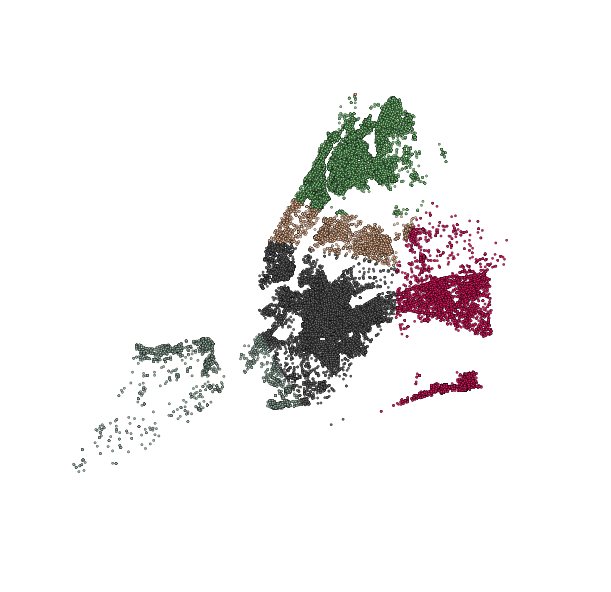

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(df3.lon, df3.lat, s=5,
            c=df3.label_gmm, cmap='Accent')
ax.set_axis_off()

## Method 2: K-means

In [33]:
kmeans = cluster.KMeans(n_clusters=n,
                        max_iter=10000).fit(data3_norm)
df3['label_kmeans'] = kmeans.labels_

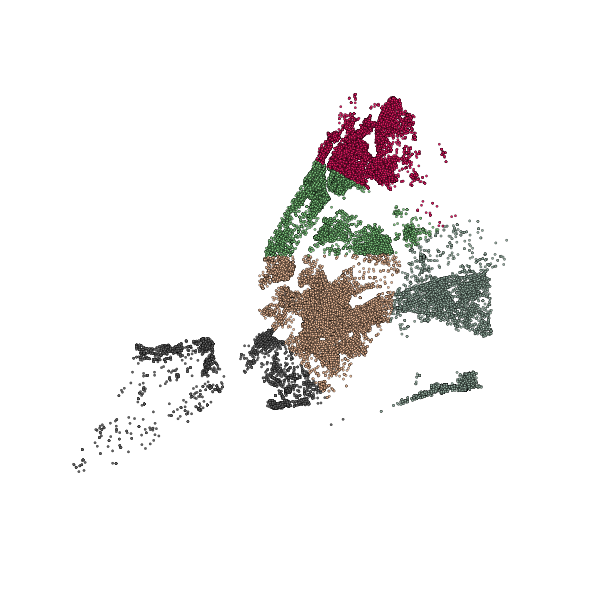

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(df3.lon, df3.lat, s=5,
            c=df3.label_kmeans, cmap='Accent')
ax.set_axis_off()

Here I used only the spatial features to cluster the data points. The idea is to verify if different clustering algorithms can recognize the boros of NYC. I used GMM and Kmeans here. For GMM, the number of clusters is 5 because I want to see if the algoritms can recognize the 5 boros. For GMM I used the covariance type diagonal (the default setting). I've set the number of iteration to 1000 just to be more sure the result has gone through more local optimal trials.

For Kmeans, the number of cluster is 5 for the same reason.

Judging from the maps, the Kmeans algorithms seems to be doing a better job clustering the 5 boros than the GMM model.

## Now I'll try cluster based on both spatial and temporal data

In [103]:
# try a different normalization strategy
data3_scale = pd.DataFrame(preprocessing.scale(data3), columns=data3.columns)

In [113]:
# set the number of clusters to 4,
# because it would become even difficult to see the clusters
n = 5
# try a number out first
gmm = GMM(n_components=n, covariance_type='full',
          random_state=2015,
          n_iter=10000).fit(data3_scale)
df3['label_gmm_st'] = gmm.predict(data3_scale)

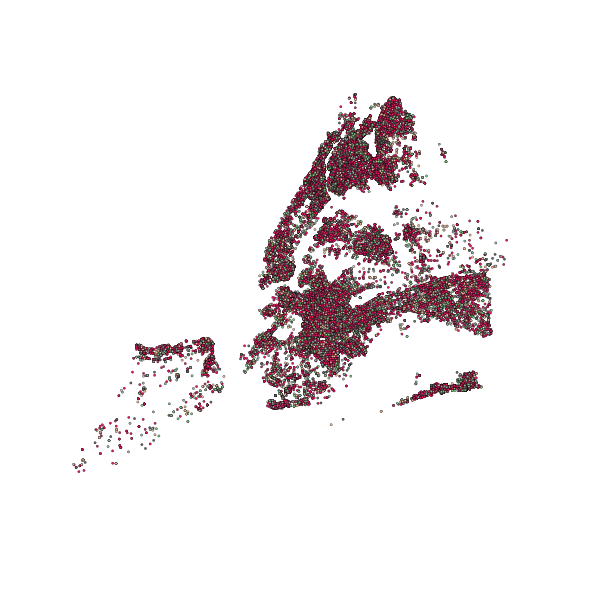

In [114]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(df3.lon, df3.lat, s=5,
            c=df3.label_gmm_st, cmap='Accent')
ax.set_axis_off()

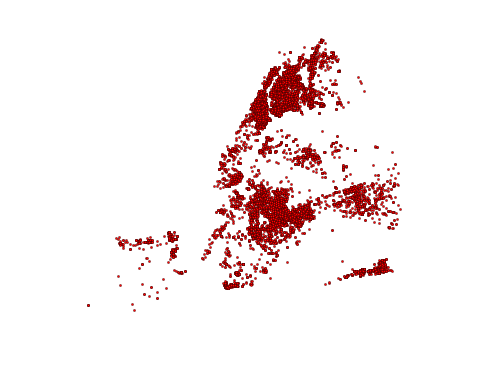

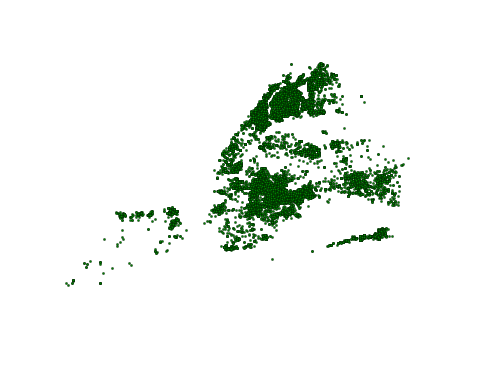

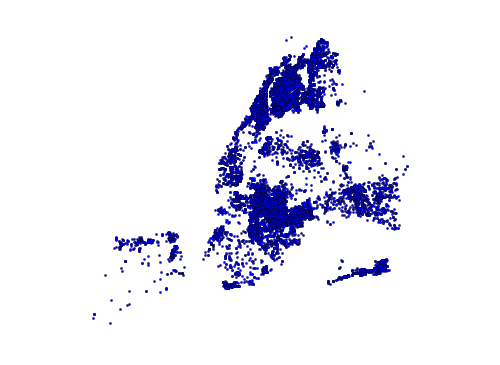

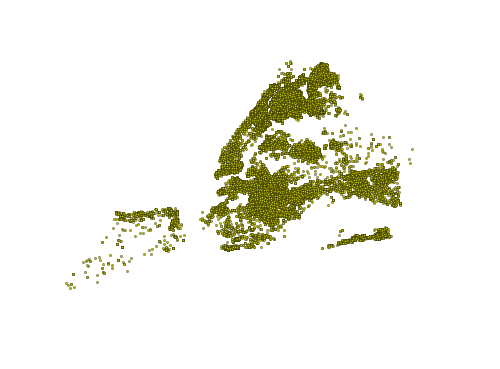

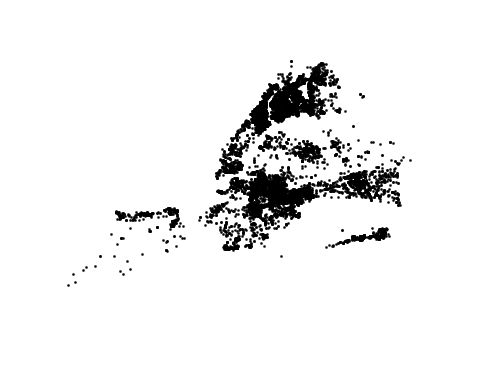

In [115]:
# draw the clusters separately
colors = ['r', 'g', 'b', 'y', 'k', 'c', 'm']
for i in range(n):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(df3[df3['label_gmm_st'] == i].lon,
                df3[df3['label_gmm_st'] == i].lat,
                s=5, c=colors[i])
    ax.set_axis_off()

In [120]:
# let's have a look at the table though
for i in range(n):
    print('cluster {0}: {1}'.format(i, Counter(df3[df3['label_gmm_st'] == i].day)))

cluster 0: Counter({'Sunday': 14928})
cluster 1: Counter({'Tuesday': 16820})
cluster 2: Counter({'Friday': 20827})
cluster 3: Counter({'Saturday': 19967, 'Wednesday': 17122, 'Thursday': 16909})
cluster 4: Counter({'Monday': 11516, 'Wednesday': 1884, 'Thursday': 1752, 'Saturday': 1714})


In [89]:
n = 5
kmeans = cluster.KMeans(n_clusters=n, tol=0.05,
                        max_iter=10000).fit(data3_scale)
df3['label_kmeans_st'] = kmeans.labels_

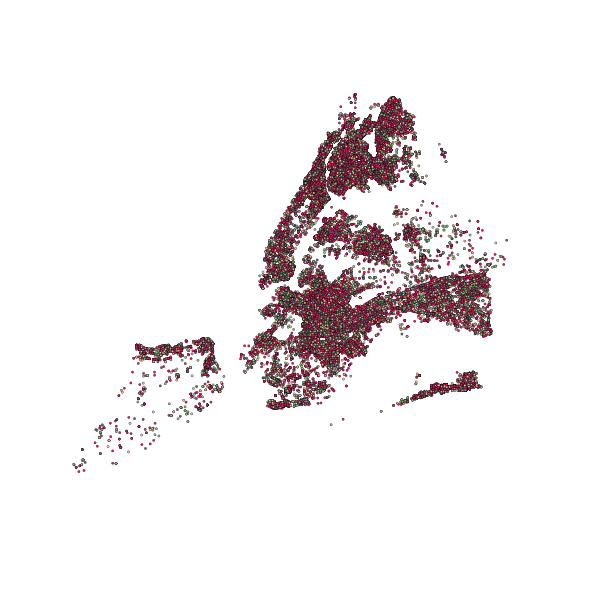

In [90]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(df3.lon, df3.lat, s=5,
            c=df3.label_kmeans_st, cmap='Accent')
ax.set_axis_off()

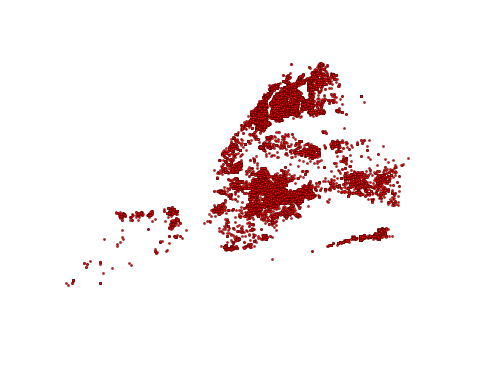

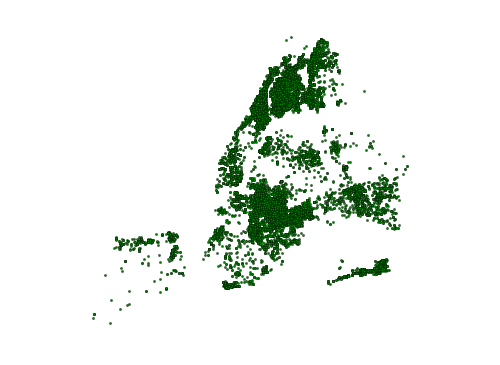

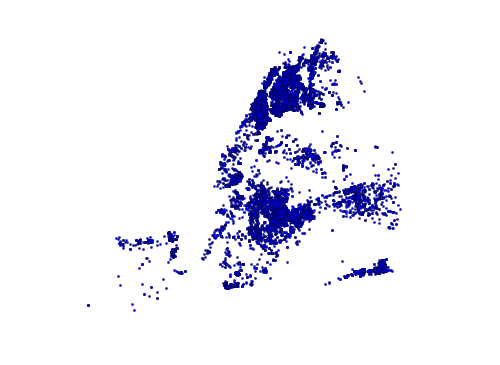

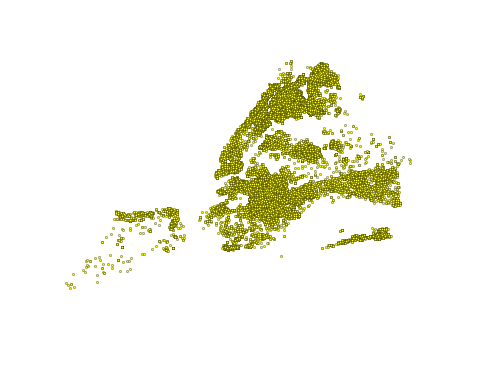

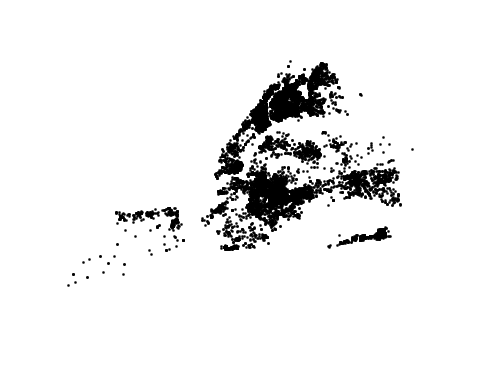

In [91]:
colors = ['r', 'g', 'b', 'y', 'k', 'c', 'm']
for i in range(n):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(df3[df3['label_kmeans_st'] == i].lon,
                df3[df3['label_kmeans_st'] == i].lat,
                s=5, c=colors[i])
    ax.set_axis_off()

In [121]:
for i in range(n):
    print('cluster {0}: {1}'.format(i, Counter(df3[df3['label_kmeans_st'] == i].day)))

cluster 0: Counter({'Tuesday': 16820})
cluster 1: Counter({'Friday': 20827})
cluster 2: Counter({'Sunday': 14928})
cluster 3: Counter({'Saturday': 21681, 'Wednesday': 19006, 'Monday': 11516})
cluster 4: Counter({'Thursday': 18661})


In this part I clustered the data based on both spatial and temporal features. Again I used the same algorithms and almost the same parameters. I tried different cluster numbers and found out that for GMM 5 clusters is an interesting number. Although there seem no geospatial pattern as can be observed on the map, in the data table we can verify quite clearly that the clusters are made depending a lot on the day of the week (there is also some less notable patterns in the time of the day, but it's not as prominent). It roughly makes the distinction between the week days and the weekends, although it doesn't match perfectly.

Basically the same story with Kmeans.

In conclusion, I think it kind of make sense if we look at it from a temporal point of view.